In [37]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('balance_hist_anon.csv',index_col=0,nrows=100000)
df.index.name='id'
df.head()

,EBIZ_BALANCE_ID,VALID_FROM,VALID_TO,GIRONUMBER,AMOUNT,CURRENCY
id,,,,,,
0,208724450,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170008-00543226,7.060565e+08,HUF
1,208724451,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170945-03286018,1.601980e+03,USD
2,208724452,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170945-03286881,6.926736e+04,EUR
3,208724453,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170008-00546085,1.509114e+08,HUF
4,208724454,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170008-00545998,1.527115e+08,HUF


In [5]:
df['VALID_FROM2'] = pd.to_datetime(df['VALID_FROM'])

In [6]:
df.head()

,EBIZ_BALANCE_ID,VALID_FROM,VALID_TO,GIRONUMBER,AMOUNT,CURRENCY,VALID_FROM2
id,,,,,,,
0,208724450,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170008-00543226,7.060565e+08,HUF,2017-04-14 22:24:01.683
1,208724451,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170945-03286018,1.601980e+03,USD,2017-04-14 22:24:01.683
2,208724452,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170945-03286881,6.926736e+04,EUR,2017-04-14 22:24:01.683
3,208724453,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170008-00546085,1.509114e+08,HUF,2017-04-14 22:24:01.683
4,208724454,2017-04-14 22:24:01.683,2017-04-14 22:26:07.497,1170008-00545998,1.527115e+08,HUF,2017-04-14 22:24:01.683


In [56]:
df.CURRENCY.value_counts()

HUF    87137
EUR    11091
USD     1536
GBP      135
RON       79
CHF       17
RSD        2
CZK        2
PLN        1
Name: CURRENCY, dtype: int64

In [ ]:
sns.displot(df.head(10000),x='AMOUNT',hue='CURRENCY')

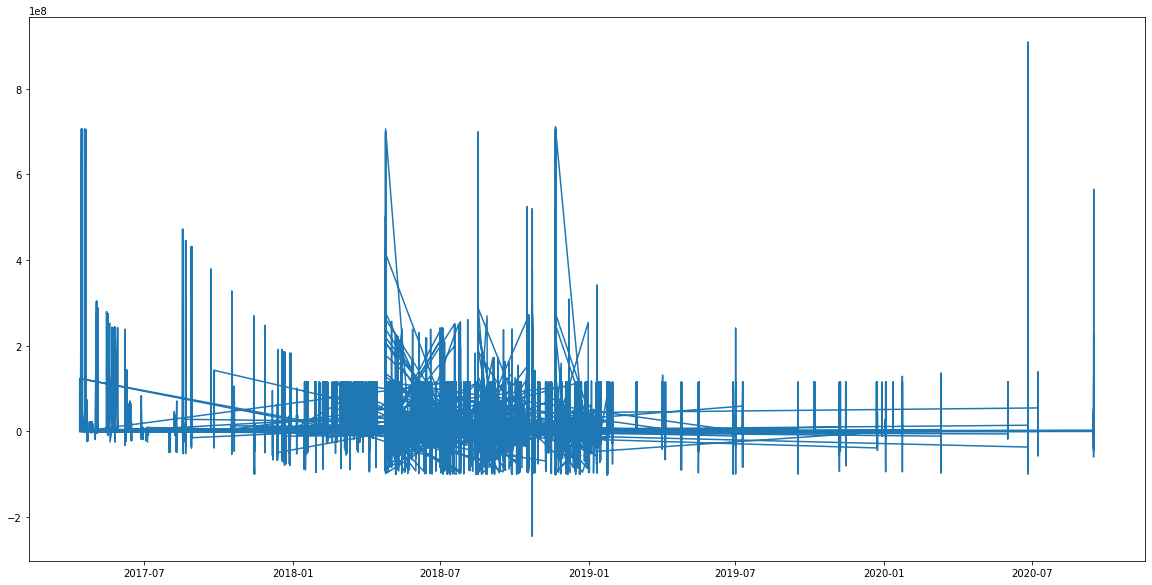

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df['VALID_FROM2'],df['AMOUNT'])

## Simple Anomaly indicator using cumulative z-score from the past 100 records

In [41]:
df['AMOUNT_AVG'] = df[df.CURRENCY == 'HUF']['AMOUNT'].expanding(100).mean()
df['AMOUNT_STD'] = df[df.CURRENCY == 'HUF']['AMOUNT'].expanding(100).std()
df['AMOUNT_ZSCORE'] = (df.AMOUNT - df.AMOUNT_AVG)/df.AMOUNT_STD
#df.loc[df2.CURRENCY == 'HUF']['AMOUNT_AVG'] = df2[df2.CURRENCY == 'HUF']['AMOUNT'].expanding(2).mean()
df.tail()

,EBIZ_BALANCE_ID,VALID_FROM,VALID_TO,GIRONUMBER,AMOUNT,CURRENCY,VALID_FROM2,AMOUNT_AVG,AMOUNT_STD,AMOUNT_ZSCORE
id,,,,,,,,,,
99995,377027677,2018-09-12 22:09:04.310,2018-10-23 09:39:52.897,11701002021455395,84321.0,HUF,2018-09-12 22:09:04.310,7.121282e+06,3.268419e+07,-0.215302
99996,377027831,2018-09-12 21:01:04.797,2018-10-23 09:39:52.897,11702551021438376,736.0,HUF,2018-09-12 21:01:04.797,7.121201e+06,3.268401e+07,-0.217858
99997,377029476,2018-09-13 07:46:25.927,2018-10-23 09:39:52.897,11709009020248189,12261939.0,HUF,2018-09-13 07:46:25.927,7.121260e+06,3.268383e+07,0.157285
99998,377029124,2018-09-13 00:25:13.063,2018-10-23 09:39:52.897,11704008020505820,3617.0,HUF,2018-09-13 00:25:13.063,7.121178e+06,3.268365e+07,-0.217771
99999,364295530,2018-08-17 16:24:18.963,2018-10-23 09:39:52.897,11709008024907420,0.0,HUF,2018-08-17 16:24:18.963,7.121096e+06,3.268347e+07,-0.217881


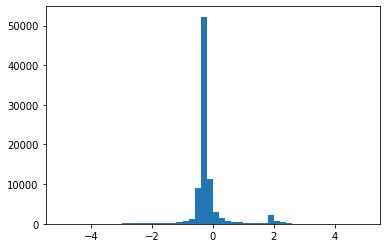

In [44]:
plt.hist(df.AMOUNT_ZSCORE,bins=50,range=[-5,5]);

In [50]:
df = df.assign(ANOMALY=lambda x: abs(x.AMOUNT_ZSCORE) >= 3)
df.tail()

,EBIZ_BALANCE_ID,VALID_FROM,VALID_TO,GIRONUMBER,AMOUNT,CURRENCY,VALID_FROM2,AMOUNT_AVG,AMOUNT_STD,AMOUNT_ZSCORE,ANOMALY
id,,,,,,,,,,,
99995,377027677,2018-09-12 22:09:04.310,2018-10-23 09:39:52.897,11701002021455395,84321.0,HUF,2018-09-12 22:09:04.310,7.121282e+06,3.268419e+07,-0.215302,False
99996,377027831,2018-09-12 21:01:04.797,2018-10-23 09:39:52.897,11702551021438376,736.0,HUF,2018-09-12 21:01:04.797,7.121201e+06,3.268401e+07,-0.217858,False
99997,377029476,2018-09-13 07:46:25.927,2018-10-23 09:39:52.897,11709009020248189,12261939.0,HUF,2018-09-13 07:46:25.927,7.121260e+06,3.268383e+07,0.157285,False
99998,377029124,2018-09-13 00:25:13.063,2018-10-23 09:39:52.897,11704008020505820,3617.0,HUF,2018-09-13 00:25:13.063,7.121178e+06,3.268365e+07,-0.217771,False
99999,364295530,2018-08-17 16:24:18.963,2018-10-23 09:39:52.897,11709008024907420,0.0,HUF,2018-08-17 16:24:18.963,7.121096e+06,3.268347e+07,-0.217881,False


In [55]:
df.ANOMALY.value_counts()

False    99535
True       465
Name: ANOMALY, dtype: int64